In [1]:
#Test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import datetime
import imageio
from scipy.interpolate import griddata
from scipy.interpolate import interp2d

import math

In [8]:
df = pd.read_csv("datasets/luftklima_reformatted.csv", delimiter=",")

In [9]:
df.head()

,Unnamed: 0,Station-ID,Name,Zeitstempel,Datum,Stunde,Minute,Koordinaten,Breitengrad,Längengrad,Lufttemperatur,Regen in 1 h,Regen in 24 h,Regen in 48 h
0,0,034003AA,Goetheanum,2020-04-02 08:39:53+02:00,2020-04-02,8,39,"47.53934,7.60146",47.53934,7.601460,15.7400,0.0,0.0,0.6
1,1,03400395,Hegenheimermattweg,2020-04-16 04:49:29+02:00,2020-04-16,4,49,"47.57551,7.58309",47.57551,7.583090,6.6333,0.0,0.0,0.0
2,2,0340997E,Laufenstrasse,2020-04-18 05:41:57+02:00,2020-04-18,5,41,"47.5935204569,7.59419060652",47.59352,7.594191,13.2700,0.0,0.0,0.0
3,3,0340018F,Areal Wolf (Mast 7),2020-04-20 11:49:23+02:00,2020-04-20,11,49,"47.54245,7.61357",47.54245,7.613570,17.7100,0.0,0.0,0.0
4,4,034001AD,Areal Wolf (Mast 6),2020-04-20 11:50:09+02:00,2020-04-20,11,50,"47.54431,7.60302",47.54431,7.603020,16.7150,0.0,0.0,0.0


In [10]:
basel_map = plt.imread("maps/new_basel_smartclimate_map.png")

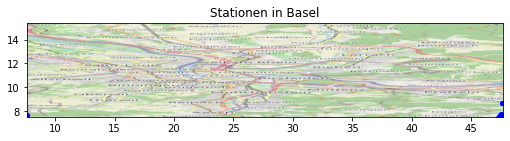

In [11]:
BBox = (df.Breitengrad.min(), df.Breitengrad.max(),df.Längengrad.min(), df.Längengrad.max())
fig, ax = plt.subplots(figsize = (8.53,8.05))
ax.scatter(df.Breitengrad, df.Längengrad, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Stationen in Basel')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(basel_map, zorder=0, extent = BBox, aspect= 'equal')

In [12]:
df.sort_values(by=["Breitengrad"])

,Unnamed: 0,Station-ID,Name,Zeitstempel,Datum,Stunde,Minute,Koordinaten,Breitengrad,Längengrad,Lufttemperatur,Regen in 1 h,Regen in 24 h,Regen in 48 h
15127,15127,03409973,Schwarzwaldstraße,2020-05-12 22:58:48+02:00,2020-05-12,22,58,"7.62377820841,7.67069959297",7.623778,7.670700,11.8700,0.0,0.2,0.2
15887,15887,03409973,Schwarzwaldstraße,2020-05-13 06:58:47+02:00,2020-05-13,6,58,"7.62377820841,7.67069959297",7.623778,7.670700,7.9400,0.0,0.2,0.2
5507,5507,03409973,Schwarzwaldstraße,2020-05-08 17:07:12+02:00,2020-05-08,17,7,"7.62377820841,7.67069959297",7.623778,7.670700,28.0750,0.0,0.0,0.0
23577,23577,03409973,Schwarzwaldstraße,2020-05-16 17:56:29+02:00,2020-05-16,17,56,"7.62377820841,7.67069959297",7.623778,7.670700,22.7600,0.0,0.0,0.0
14395,14395,03409973,Schwarzwaldstraße,2020-05-12 14:58:49+02:00,2020-05-12,14,58,"7.62377820841,7.67069959297",7.623778,7.670700,15.4100,0.0,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242315,242315,03409FE9,ex deBW Colmarer Straße,2020-08-07 14:07:38+02:00,2020-08-07,14,7,"47.6935517966,7.59418859482",47.693552,7.594189,26.1600,0.0,0.0,0.0
210725,210725,03409FE9,ex deBW Colmarer Straße,2020-07-27 16:08:21+02:00,2020-07-27,16,8,"47.6935517966,7.59418859482",47.693552,7.594189,27.1550,0.0,0.0,0.0
224638,224638,03409FE9,ex deBW Colmarer Straße,2020-08-01 12:08:02+02:00,2020-08-01,12,8,"47.6935517966,7.59418859482",47.693552,7.594189,27.7500,0.0,0.0,0.0
242474,242474,03409FE9,ex deBW Colmarer Straße,2020-08-07 15:52:38+02:00,2020-08-07,15,52,"47.6935517966,7.59418859482",47.693552,7.594189,26.3750,0.0,0.0,0.0


In [13]:
df = df.drop(df[df["Station-ID"] == "03409973"].index) #Breitengrad von 7.62 anstatt 47

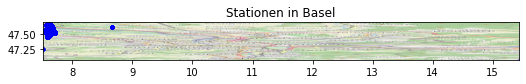

In [14]:
BBox = (df.Längengrad.min(), df.Längengrad.max(),df.Breitengrad.min(), df.Breitengrad.max())
fig, ax = plt.subplots(figsize = (8.53,8.05))
ax.scatter(df.Längengrad, df.Breitengrad, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Stationen in Basel')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(basel_map, zorder=0, extent = BBox, aspect= 'equal')

In [15]:
df.sort_values(by=["Längengrad"])

,Unnamed: 0,Station-ID,Name,Zeitstempel,Datum,Stunde,Minute,Koordinaten,Breitengrad,Längengrad,Lufttemperatur,Regen in 1 h,Regen in 24 h,Regen in 48 h
1017955,1017955,03A0B2CB,Weissenstein (Jura),2021-04-27 10:00:00+02:00,2021-04-27,10,0,"47.253517,7.50797",47.253517,7.50797,6.18,0.0,30.0,30.0
1012800,1012800,03A0B2CB,Weissenstein (Jura),2021-04-25 21:00:00+02:00,2021-04-25,21,0,"47.253517,7.50797",47.253517,7.50797,6.18,0.0,30.0,30.0
1012801,1012801,03A0B2CB,Weissenstein (Jura),2021-04-25 21:00:00+02:00,2021-04-25,21,0,"47.253517,7.50797",47.253517,7.50797,0.85,0.0,143.0,143.0
1018232,1018232,03A0B2CB,Weissenstein (Jura),2021-04-27 12:00:00+02:00,2021-04-27,12,0,"47.253517,7.50797",47.253517,7.50797,10.54,0.0,0.0,0.0
1018233,1018233,03A0B2CB,Weissenstein (Jura),2021-04-27 12:00:00+02:00,2021-04-27,12,0,"47.253517,7.50797",47.253517,7.50797,8.40,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22574,22574,0340A014,Karton_5,2020-05-16 07:14:29+02:00,2020-05-16,7,14,"47.615889,8.6506304",47.615889,8.65063,15.30,0.0,0.0,0.0
44112,44112,03409FFD,Karton 5,2020-05-25 10:43:36+02:00,2020-05-25,10,43,"47.615889,8.6506304",47.615889,8.65063,24.22,0.0,0.0,0.0
64410,64410,03409FFD,Karton 5,2020-06-02 21:04:34+02:00,2020-06-02,21,4,"47.615889,8.6506304",47.615889,8.65063,23.34,0.0,0.0,0.4
22575,22575,0340A014,OFFICE test 20200615z1630 - Test - DEFEKT,2020-05-16 07:14:29+02:00,2020-05-16,7,14,"47.615889,8.6506304",47.615889,8.65063,15.30,0.0,0.0,0.0


In [16]:
df = df.drop(df[df["Station-ID"] == "0340AD75"].index) # Breitengrad 15 macht keinen Sinn
df = df.drop(df[df["Station-ID"] == "03409FFD"].index) # Längengrad von 8.65 statt 7.5
df = df.drop(df[df["Station-ID"] == "03409FFF"].index) # Längengrad von 8.65 statt 7.5
df = df.drop(df[df["Längengrad"] > 8].index) # Längengrad von 8.65 statt 7.5
df = df.drop(df[df["Station-ID"] == "03A0B2CB"].index) # Im Jura

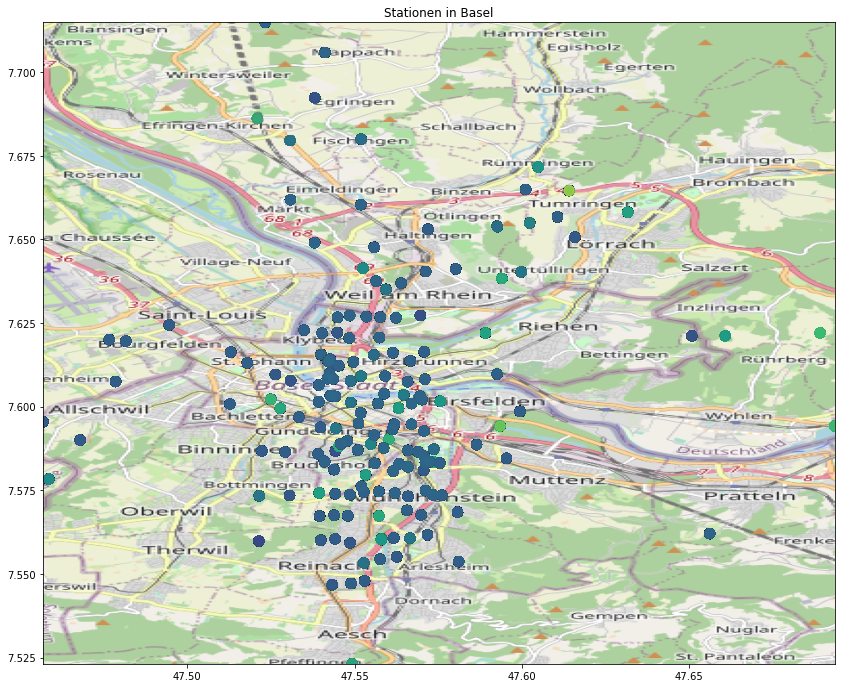

In [17]:
BBox = (df.Breitengrad.min(), df.Breitengrad.max(),df.Längengrad.min(), df.Längengrad.max())

fig = plt.figure(figsize = (17.06,11.8))
plt.scatter(df.Breitengrad, df.Längengrad, zorder=1, alpha= 0.2, c=df.Lufttemperatur, s=100)
plt.title("Stationen in Basel")
plt.xlim(BBox[0], BBox[1])
plt.ylim(BBox[2], BBox[3])

plt.imshow(basel_map, zorder=0, extent = BBox)
plt.show()

In [67]:
(df.Längengrad.min(), df.Längengrad.max(), df.Breitengrad.min(), df.Breitengrad.max())

(7.52312, 7.71486, 47.45687, 47.6935517966)

In [68]:
fig.savefig('smartclimate_stations.png')

In [69]:
first_try = df[df["Datum"] == "2021-08-07"]

In [70]:
len(first_try)

3065

In [217]:
# garbage
lats, longs = [], []
x = datetime.date(2020, 8, 4)

fig = plt.figure(figsize=(17.06,11.8))
plt.scatter(df.Breitengrad, df.Längengrad, zorder=1, alpha= 0.2, c=df.Lufttemperatur, s=100)
plt.title("Stationen in Basel")
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(BBox[0], BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    return ln,


for i in range(0, 5):
    x2 = x.strftime("%Y-%m-%d")
    #print(x2)
    a = df[df["Datum"] == x2]
    x = x + datetime.timedelta(days=1)
    
    lats.append(a["Breitengrad"])
    longs.append(a["Längengrad"])

ani = 0
    

'\nlats, longs = [], []\nx = datetime.date(2020, 8, 4)\n\nfig = plt.figure(figsize=(17.06,11.8))\nplt.scatter(df.Breitengrad, df.Längengrad, zorder=1, alpha= 0.2, c=df.Lufttemperatur\t, s=100)\nplt.title("Stationen in Basel")\nfig, ax = plt.subplots()\nln, = plt.plot([], [], \'ro\')\n\ndef init():\n    ax.set_xlim(BBox[0], BBox[1])\n    ax.set_ylim(BBox[2], BBox[3])\n    return ln,\n\n\nfor i in range(0, 5):\n    x2 = x.strftime("%Y-%m-%d")\n    #print(x2)\n    a = df[df["Datum"] == x2]\n    x = x + datetime.timedelta(days=1)\n    \n    lats.append(a["Breitengrad"])\n    longs.append(a["Längengrad"])\n\nani = 0\n'

In [31]:
BBox = (df.Längengrad.min(), df.Längengrad.max(),df.Breitengrad.min(), df.Breitengrad.max())
x = datetime.datetime(2020, 8, 4, 0)
for i in range(0, 10):
    date = x.strftime("%Y-%m-%d")
    hour = x.strftime("%H")
    #print(x2)
    a = df[df["Datum"] == date]
    b = a[a["Stunde"] == int(hour)]
    x = x + datetime.timedelta(hours=4)
    
    fig = plt.figure(figsize=(30.1,16.36))
    plt.scatter(b.Längengrad, b.Breitengrad, zorder=1, alpha= 0.8, c=b.Lufttemperatur, s=100)
    plt.title("Stationen in Basel : " + x.strftime("%Y-%m-%d-%H"))
    plt.xlim(BBox[0], BBox[1])
    plt.ylim(BBox[2], BBox[3])
    plt.imshow(basel_map, zorder=0, extent = BBox)
    img_name = "test_images/img" + str(i) + ".png" 
    fig.savefig(img_name)
    plt.close()
    


In [303]:
import imageio
images = []
for i in range(0,50):
    images.append(imageio.imread("test_images/img" + str(i) + ".png"))
imageio.mimsave("test_images/movie2.gif", images, 'GIF', fps=3)

In [254]:
x = datetime.datetime(2020, 8, 4, 12)
for i in range (0,25):
    x += datetime.timedelta(hours=1)
    print(x)

2020-08-04 13:00:00
2020-08-04 14:00:00
2020-08-04 15:00:00
2020-08-04 16:00:00
2020-08-04 17:00:00
2020-08-04 18:00:00
2020-08-04 19:00:00
2020-08-04 20:00:00
2020-08-04 21:00:00
2020-08-04 22:00:00
2020-08-04 23:00:00
2020-08-05 00:00:00
2020-08-05 01:00:00
2020-08-05 02:00:00
2020-08-05 03:00:00
2020-08-05 04:00:00
2020-08-05 05:00:00
2020-08-05 06:00:00
2020-08-05 07:00:00
2020-08-05 08:00:00
2020-08-05 09:00:00
2020-08-05 10:00:00
2020-08-05 11:00:00
2020-08-05 12:00:00
2020-08-05 13:00:00


In [37]:
x = datetime.datetime(2020, 8, 4, 5)

hour = x.strftime("%H")
test = df[df["Stunde"] == int(hour)]
print(hour, int(hour))

05 5


In [38]:
test.head()

,Unnamed: 0,Station-ID,Name,Zeitstempel,Datum,Stunde,Minute,Koordinaten,Breitengrad,Längengrad,Lufttemperatur,Regen in 1 h,Regen in 24 h,Regen in 48 h
2,2,0340997E,Laufenstrasse,2020-04-18 05:41:57+02:00,2020-04-18,5,41,"47.5935204569,7.59419060652",47.59352,7.594191,13.270,0.0,0.0,0.0
118,118,0340018F,Areal Wolf (Mast 7),2020-04-21 05:04:21+02:00,2020-04-21,5,4,"47.54245,7.61357",47.54245,7.613570,12.405,0.0,0.0,0.0
119,119,034001AD,Areal Wolf (Mast 6),2020-04-21 05:05:06+02:00,2020-04-21,5,5,"47.54431,7.60302",47.54431,7.603020,12.215,0.0,0.0,0.0
120,120,03400189,Areal Wolf (Mast 3),2020-04-21 05:06:40+02:00,2020-04-21,5,6,"47.54531,7.61225",47.54531,7.612250,12.205,0.0,0.0,0.0
121,121,034001B3,Areal Wolf (Mast 4),2020-04-21 05:06:53+02:00,2020-04-21,5,6,"47.54352,7.61214",47.54352,7.612140,12.285,0.0,0.0,0.0


In [40]:
df.head()

,Unnamed: 0,Station-ID,Name,Zeitstempel,Datum,Stunde,Minute,Koordinaten,Breitengrad,Längengrad,Lufttemperatur,Regen in 1 h,Regen in 24 h,Regen in 48 h
0,0,034003AA,Goetheanum,2020-04-02 08:39:53+02:00,2020-04-02,8,39,"47.53934,7.60146",47.53934,7.601460,15.7400,0.0,0.0,0.6
1,1,03400395,Hegenheimermattweg,2020-04-16 04:49:29+02:00,2020-04-16,4,49,"47.57551,7.58309",47.57551,7.583090,6.6333,0.0,0.0,0.0
2,2,0340997E,Laufenstrasse,2020-04-18 05:41:57+02:00,2020-04-18,5,41,"47.5935204569,7.59419060652",47.59352,7.594191,13.2700,0.0,0.0,0.0
3,3,0340018F,Areal Wolf (Mast 7),2020-04-20 11:49:23+02:00,2020-04-20,11,49,"47.54245,7.61357",47.54245,7.613570,17.7100,0.0,0.0,0.0
4,4,034001AD,Areal Wolf (Mast 6),2020-04-20 11:50:09+02:00,2020-04-20,11,50,"47.54431,7.60302",47.54431,7.603020,16.7150,0.0,0.0,0.0


In [60]:
basel = plt.imread("maps/basel_square.png")
BBox = (7.5554,7.6240,47.5342,47.5815)
x = datetime.datetime(2020, 8, 4, 0)

for i in range(0, 30):
    date = x.strftime("%Y-%m-%d")
    hour = x.strftime("%H")
    #print(x2)
    a = df[df["Datum"] == date]
    b = a[a["Stunde"] == int(hour)]
    x = x + datetime.timedelta(hours=4)
    
    lats = b.Breitengrad
    longs = b.Längengrad
    temp = b.Lufttemperatur

    plt.figure(figsize=(11.6, 11.93), dpi=100)
    plt.scatter(longs, lats, marker="o", zorder=1, c=temp, s=200)
    plt.title("Basel Temperature 2021/11/09")
    plt.colorbar(label="Temperature in C°")
    plt.clim(-10, 20)
    plt.xlim(BBox[0], BBox[1])
    plt.ylim(BBox[2], BBox[3])
    plt.imshow(basel, zorder=0, extent=BBox, aspect="auto")
    img_name = "test_images/img" + str(i) + ".png" 
    plt.savefig(img_name)
    plt.close()

In [61]:
import imageio
images = []
for i in range(0,10):
    images.append(imageio.imread("test_images/img" + str(i) + ".png"))
imageio.mimsave("test_images/movie2.gif", images, 'GIF', fps=5)

In [50]:
#per day average

KeyboardInterrupt: 

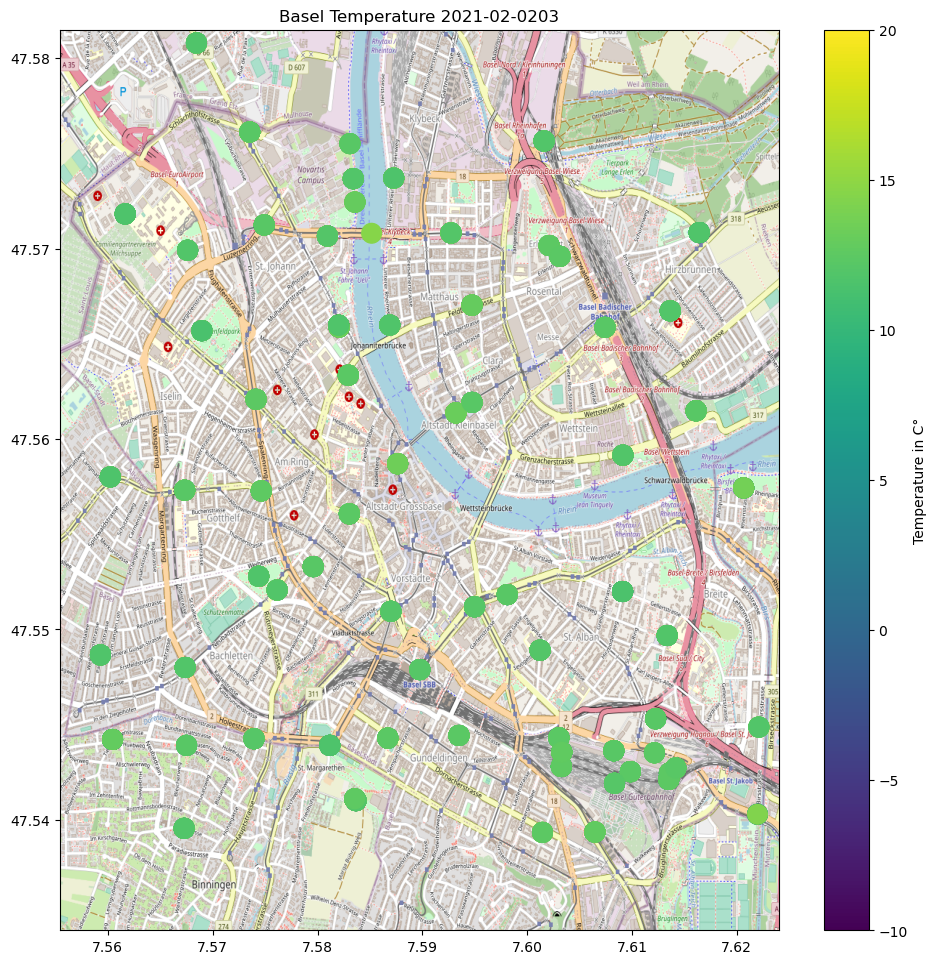

In [128]:
basel = plt.imread("maps/basel_square.png")
BBox = (7.5554,7.6240,47.5342,47.5815)
x = datetime.datetime(2021, 2, 1, 0)

for i in range(0, 240):
    date = x.strftime("%Y-%m-%d")
    hour = x.strftime("%H")
    a = df[df["Datum"] == date]
    #b = a[a["Stunde"] == int(hour)]
    x = x + datetime.timedelta(hours=3)    
    #print(x2)
    a.groupby('Station-ID', as_index=False)['Lufttemperatur'].mean()
    
    lats = a.Breitengrad
    longs = a.Längengrad
    temp = a.Lufttemperatur

    plt.figure(figsize=(11.6, 11.93), dpi=100)
    plt.scatter(longs, lats, marker="o", zorder=1, c=temp, s=200)
    plt.title("Basel Temperature " + date + hour)
    plt.clim(-10, 20)
    plt.colorbar(label="Temperature in C°")
    plt.xlim(BBox[0], BBox[1])
    plt.ylim(BBox[2], BBox[3])
    plt.imshow(basel, zorder=0, extent=BBox, aspect="auto")
    img_name = "test_images/febh_img" + str(i) + ".png" 
    plt.savefig(img_name)
    plt.close()

In [67]:
import imageio
images = []
for i in range(0,10):
    images.append(imageio.imread("test_images/img" + str(i) + ".png"))
imageio.mimsave("test_images/feb.gif", images, 'GIF', fps=2)

In [127]:
basel = plt.imread("maps/basel_square.png")
BBox = (7.5554,7.6240,47.5342,47.5815)
x = datetime.datetime(2021, 2, 1, 0)

for i in range(0, 30):
    date = x.strftime("%Y-%m-%d")
    hour = x.strftime("%H")
    a = df[df["Datum"] == date]
    aa = df[df["Datum"] == date]
    #b = a[a["Stunde"] == int(hour)]
    x = x + datetime.timedelta(days=1)    
    #print(x2)
    a.groupby('Station-ID', as_index=False)['Lufttemperatur'].mean()
    
    lats = a.Breitengrad.to_numpy()
    longs = a.Längengrad.to_numpy()
    temp = a.Lufttemperatur
    
    print("LEN BEFORE: ", len(lats))
    
    for k in range(0, len(lats)):
        test = aa[aa["Breitengrad"] == lats[k]]
        test = test[test["Längengrad"] == longs[k]]
        station = test["Station-ID"].to_numpy()
        #print(station[0])
        if len(test) != 24:
            a = a.drop(a[a["Station-ID"] == station[0]].index)
            
    lats = a.Breitengrad.to_numpy()
    longs = a.Längengrad.to_numpy()
    temp = a.Lufttemperatur
    
    print("AFTER: ", len(lats))
    
    #print(lats)
        
    points = []
    for j in range(0, len(lats)):
        points.append([longs[j], lats[j]])
    points = np.array(points)
    
    grid_x, grid_y = np.mgrid[BBox[0]:BBox[1]:100j, BBox[2]:BBox[3]:100j]
    
    grid = griddata(points, temp, (grid_x, grid_y), method="cubic")
    
    plt.figure(figsize=(11.6, 11.93), dpi=100)
    plt.title("Basel Temperature 2021/11/09")
    plt.imshow(grid, extent=BBox, zorder=1, alpha=0.7)
    plt.imshow(basel, extent=BBox, zorder=0, aspect="auto")
    plt.clim(-10, 20)
    plt.colorbar(label="Temperature in C°")
    img_name = "test_images/interpolated_img" + str(i) + ".png" 
    plt.savefig(img_name)
    plt.close()

LEN BEFORE:  2513
AFTER:  1878
LEN BEFORE:  2508
AFTER:  1920
LEN BEFORE:  2375
AFTER:  1872
LEN BEFORE:  2474
AFTER:  1728
LEN BEFORE:  2689
AFTER:  1944
LEN BEFORE:  2453
AFTER:  146
LEN BEFORE:  2431
AFTER:  1848
LEN BEFORE:  2466
AFTER:  1896
LEN BEFORE:  2434
AFTER:  1896
LEN BEFORE:  2388
AFTER:  1944
LEN BEFORE:  2400


KeyboardInterrupt: 

In [96]:
import imageio
images = []
for i in range(0,10):
    images.append(imageio.imread("test_images/interpolated_img" + str(i) + ".png"))
imageio.mimsave("test_images/interpolated_feb.gif", images, 'GIF', fps=4)

In [130]:
basel = plt.imread("maps/basel_square.png")
BBox = (7.5554,7.6240,47.5342,47.5815)
x = datetime.datetime(2021, 2, 1, 0)

for i in range(0, 240):
    date = x.strftime("%Y-%m-%d")
    hour = x.strftime("%H")
    a = df[df["Datum"] == date]
    b = a[a["Stunde"] == int(hour)]
    x = x + datetime.timedelta(hours=3)
    
    lats = b.Breitengrad.to_numpy()
    longs = b.Längengrad.to_numpy()
    temp = b.Lufttemperatur
    
    points = []
    for j in range(0, len(lats)):
        points.append([longs[j], lats[j]])
    points = np.array(points)
    
    grid_x, grid_y = np.mgrid[BBox[0]:BBox[1]:100j, BBox[2]:BBox[3]:100j]
    
    grid = griddata(points, temp, (grid_x, grid_y), method="cubic")
    
    plt.figure(figsize=(11.6, 11.93), dpi=100)
    plt.title("Basel Temperature " + date + hour)
    plt.imshow(grid, extent=BBox, zorder=1, alpha=0.7)
    plt.imshow(basel, extent=BBox, zorder=0, aspect="auto")
    plt.clim(-10, 20)
    plt.colorbar(label="Temperature in C°")
    img_name = "test_images/febh_img" + str(i) + ".png" 
    plt.savefig(img_name)
    plt.close()

In [132]:
import imageio
images = []
for i in range(0,240):
    images.append(imageio.imread("test_images/febh_img" + str(i) + ".png"))
imageio.mimsave("test_images/interpolated_febh.gif", images, 'GIF', fps=8)

In [178]:
basel = plt.imread("maps/basel_square.png")
BBox = (7.5554,7.6240,47.5342,47.5815)
x = datetime.datetime(2021, 2, 1, 0)

for i in range(0, 240):
    date = x.strftime("%Y-%m-%d")
    hour = x.strftime("%H")
    #print(x2)
    a = df[df["Datum"] == date]
    b = a[a["Stunde"] == int(hour)]
    x = x + datetime.timedelta(hours=3)
    
    lats = b.Breitengrad
    longs = b.Längengrad
    temp = b.Lufttemperatur
    #print("LATS1: " , lats.head(), " : LONGS1: " , longs.head(), " : TEMP1: " , temp.head())
    #print(lats.head())
    
    plt.figure(figsize=(11.6, 11.93), dpi=100)
    plt.scatter(longs, lats, marker="o", zorder=1, c=temp, s=200)
    plt.title("Basel Temperature 2021/11/09")
    plt.colorbar(label="Temperature in C°")
    plt.clim(-10, 20)
    plt.xlim(BBox[0], BBox[1])
    plt.ylim(BBox[2], BBox[3])
    plt.imshow(basel, zorder=0, extent=BBox, aspect="auto")
    img_name = "test_images/a_nonin_img" + str(i) + ".png" 
    plt.savefig(img_name)
    plt.close()
    
    lats = b.Breitengrad.to_numpy()
    longs = b.Längengrad.to_numpy()
    temp = b.Lufttemperatur.to_numpy()
    
    #print("LATS2: " , lats[0:5], " : LONGS2: " , longs[0:5], " : TEMP2: " , temp[0:5])
    print(lats[0:5], " : ", longs[0:5])
    
    
    points = []
    for j in range(0, len(lats)):
        points.append([longs[j], lats[j]])
    points = np.array(points)
    print("points: ", points[0:5])
    
    
    grid_x, grid_y = np.mgrid[BBox[0]:BBox[1]:1000j, BBox[2]:BBox[3]:1000j]
    
    grid = griddata(points, temp, (grid_x, grid_y), method = "cubic")
    
    plt.figure(figsize=(11.6, 11.93), dpi=100)
    plt.title("Basel Temperature " + date + hour)
    plt.imshow(grid, extent=BBox, zorder=1, alpha=0.7)
    plt.clim(-10, 20)
    plt.colorbar(label="Temperature in C°")
    plt.imshow(basel, extent=BBox, zorder=0, aspect="auto")
  
    
    
    img_name = "test_images/a_in_img" + str(i) + ".png" 
    plt.savefig(img_name)
    plt.close()

[47.56588 47.55207 47.5428  47.5737  47.57016]  :  [7.58206 7.57615 7.60326 7.58727 7.60209]
points:  [[ 7.58206 47.56588]
 [ 7.57615 47.55207]
 [ 7.60326 47.5428 ]
 [ 7.58727 47.5737 ]
 [ 7.60209 47.57016]]
[47.56588    47.55193218 47.5428     47.5737     47.57016   ]  :  [7.58206    7.66038122 7.60326    7.58727    7.60209   ]
points:  [[ 7.58206    47.56588   ]
 [ 7.66038122 47.55193218]
 [ 7.60326    47.5428    ]
 [ 7.58727    47.5737    ]
 [ 7.60209    47.57016   ]]
[47.56588 47.55207 47.5428  47.5737  47.57016]  :  [7.58206 7.57615 7.60326 7.58727 7.60209]
points:  [[ 7.58206 47.56588]
 [ 7.57615 47.55207]
 [ 7.60326 47.5428 ]
 [ 7.58727 47.5737 ]
 [ 7.60209 47.57016]]
[47.56588 47.55207 47.5428  47.5737  47.57016]  :  [7.58206 7.57615 7.60326 7.58727 7.60209]
points:  [[ 7.58206 47.56588]
 [ 7.57615 47.55207]
 [ 7.60326 47.5428 ]
 [ 7.58727 47.5737 ]
 [ 7.60209 47.57016]]
[47.55207 47.5428  47.5737  47.57016 47.55095]  :  [7.57615 7.60326 7.58727 7.60209 7.587  ]
points:  [[ 7.5

[47.5737  47.56588 47.57016 47.57551 47.54101]  :  [7.58727 7.58206 7.60209 7.58309 7.58367]
points:  [[ 7.58727 47.5737 ]
 [ 7.58206 47.56588]
 [ 7.60209 47.57016]
 [ 7.58309 47.57551]
 [ 7.58367 47.54101]]
[47.56588 47.5737  47.57016 47.57551 47.46801]  :  [7.58206 7.58727 7.60209 7.58309 7.59001]
points:  [[ 7.58206 47.56588]
 [ 7.58727 47.5737 ]
 [ 7.60209 47.57016]
 [ 7.58309 47.57551]
 [ 7.59001 47.46801]]
[47.56588 47.57016 47.57551 47.45687 47.54101]  :  [7.58206 7.60209 7.58309 7.59547 7.58367]
points:  [[ 7.58206 47.56588]
 [ 7.60209 47.57016]
 [ 7.58309 47.57551]
 [ 7.59547 47.45687]
 [ 7.58367 47.54101]]
[47.56588 47.57016 47.46801 47.45687 47.54101]  :  [7.58206 7.60209 7.59001 7.59547 7.58367]
points:  [[ 7.58206 47.56588]
 [ 7.60209 47.57016]
 [ 7.59001 47.46801]
 [ 7.59547 47.45687]
 [ 7.58367 47.54101]]
[47.5737  47.56588 47.57016 47.54101 47.54845]  :  [7.58727 7.58206 7.60209 7.58367 7.62052]
points:  [[ 7.58727 47.5737 ]
 [ 7.58206 47.56588]
 [ 7.60209 47.57016]
 [ 

[47.56588 47.46801 47.54101 47.47859 47.56991]  :  [7.58206 7.59001 7.58367 7.60749 7.56761]
points:  [[ 7.58206 47.56588]
 [ 7.59001 47.46801]
 [ 7.58367 47.54101]
 [ 7.60749 47.47859]
 [ 7.56761 47.56991]]
[47.56588 47.46801 47.54101 47.47859 47.56991]  :  [7.58206 7.59001 7.58367 7.60749 7.56761]
points:  [[ 7.58206 47.56588]
 [ 7.59001 47.46801]
 [ 7.58367 47.54101]
 [ 7.60749 47.47859]
 [ 7.56761 47.56991]]
[47.56588 47.46801 47.54101 47.47859 47.56991]  :  [7.58206 7.59001 7.58367 7.60749 7.56761]
points:  [[ 7.58206 47.56588]
 [ 7.59001 47.46801]
 [ 7.58367 47.54101]
 [ 7.60749 47.47859]
 [ 7.56761 47.56991]]
[47.56588 47.54101 47.47859 47.46801 47.54253]  :  [7.58206 7.58367 7.60749 7.59001 7.60985]
points:  [[ 7.58206 47.56588]
 [ 7.58367 47.54101]
 [ 7.60749 47.47859]
 [ 7.59001 47.46801]
 [ 7.60985 47.54253]]
[47.56588 47.46801 47.54101 47.47859 47.54891]  :  [7.58206 7.59001 7.58367 7.60749 7.60123]
points:  [[ 7.58206 47.56588]
 [ 7.59001 47.46801]
 [ 7.58367 47.54101]
 [ 

[47.56588 47.54101 47.57121 47.52331 47.54253]  :  [7.58206 7.58367 7.58329 7.71486 7.60985]
points:  [[ 7.58206 47.56588]
 [ 7.58367 47.54101]
 [ 7.58329 47.57121]
 [ 7.71486 47.52331]
 [ 7.60985 47.54253]]
[47.56588 47.58648 47.54101 47.57121 47.53983]  :  [7.58206 7.58861 7.58367 7.58329 7.59381]
points:  [[ 7.58206 47.56588]
 [ 7.58861 47.58648]
 [ 7.58367 47.54101]
 [ 7.58329 47.57121]
 [ 7.59381 47.53983]]
[47.53934 47.56588 47.54101 47.57121 47.54253]  :  [7.60146 7.58206 7.58367 7.58329 7.60985]
points:  [[ 7.60146 47.53934]
 [ 7.58206 47.56588]
 [ 7.58367 47.54101]
 [ 7.58329 47.57121]
 [ 7.60985 47.54253]]
[47.56588 47.54101 47.57121 47.52331 47.53983]  :  [7.58206 7.58367 7.58329 7.71486 7.59381]
points:  [[ 7.58206 47.56588]
 [ 7.58367 47.54101]
 [ 7.58329 47.57121]
 [ 7.71486 47.52331]
 [ 7.59381 47.53983]]
[47.56588 47.58648 47.54101 47.57121 47.52331]  :  [7.58206 7.58861 7.58367 7.58329 7.71486]
points:  [[ 7.58206 47.56588]
 [ 7.58861 47.58648]
 [ 7.58367 47.54101]
 [ 

[47.56588 47.56024 47.54101 47.57121 47.52331]  :  [7.58206 7.59016 7.58367 7.58329 7.71486]
points:  [[ 7.58206 47.56588]
 [ 7.59016 47.56024]
 [ 7.58367 47.54101]
 [ 7.58329 47.57121]
 [ 7.71486 47.52331]]
[47.56588 47.56024 47.54101 47.52331 47.54253]  :  [7.58206 7.59016 7.58367 7.71486 7.60985]
points:  [[ 7.58206 47.56588]
 [ 7.59016 47.56024]
 [ 7.58367 47.54101]
 [ 7.71486 47.52331]
 [ 7.60985 47.54253]]
[47.56588 47.56024 47.54101 47.57121 47.52331]  :  [7.58206 7.59016 7.58367 7.58329 7.71486]
points:  [[ 7.58206 47.56588]
 [ 7.59016 47.56024]
 [ 7.58367 47.54101]
 [ 7.58329 47.57121]
 [ 7.71486 47.52331]]
[47.56588 47.56024 47.54101 47.57121 47.52331]  :  [7.58206 7.59016 7.58367 7.58329 7.71486]
points:  [[ 7.58206 47.56588]
 [ 7.59016 47.56024]
 [ 7.58367 47.54101]
 [ 7.58329 47.57121]
 [ 7.71486 47.52331]]
[47.56588 47.54101 47.56024 47.57121 47.52331]  :  [7.58206 7.58367 7.59016 7.58329 7.71486]
points:  [[ 7.58206 47.56588]
 [ 7.58367 47.54101]
 [ 7.59016 47.56024]
 [ 

[47.56588 47.57121 47.52331 47.54253 47.58023]  :  [7.58206 7.58329 7.71486 7.60985 7.64115]
points:  [[ 7.58206 47.56588]
 [ 7.58329 47.57121]
 [ 7.71486 47.52331]
 [ 7.60985 47.54253]
 [ 7.64115 47.58023]]
[47.56588 47.57121 47.52331 47.53983 47.54891]  :  [7.58206 7.58329 7.71486 7.59381 7.60123]
points:  [[ 7.58206 47.56588]
 [ 7.58329 47.57121]
 [ 7.71486 47.52331]
 [ 7.59381 47.53983]
 [ 7.60123 47.54891]]
[47.56588 47.57121 47.52331 47.54332 47.54891]  :  [7.58206 7.58329 7.71486 7.54676 7.60123]
points:  [[ 7.58206 47.56588]
 [ 7.58329 47.57121]
 [ 7.71486 47.52331]
 [ 7.54676 47.54332]
 [ 7.60123 47.54891]]
[47.56588 47.57121 47.52331 47.53983 47.54253]  :  [7.58206 7.58329 7.71486 7.59381 7.60985]
points:  [[ 7.58206 47.56588]
 [ 7.58329 47.57121]
 [ 7.71486 47.52331]
 [ 7.59381 47.53983]
 [ 7.60985 47.54253]]
[47.56588 47.56588 47.57121 47.52331 47.53983]  :  [7.58206 7.58206 7.58329 7.71486 7.59381]
points:  [[ 7.58206 47.56588]
 [ 7.58206 47.56588]
 [ 7.58329 47.57121]
 [ 

[47.56588 47.52331 47.54891 47.54332 47.54253]  :  [7.58206 7.71486 7.60123 7.54676 7.60985]
points:  [[ 7.58206 47.56588]
 [ 7.71486 47.52331]
 [ 7.60123 47.54891]
 [ 7.54676 47.54332]
 [ 7.60985 47.54253]]
[47.56588 47.52331 47.54891 47.54253 47.58023]  :  [7.58206 7.71486 7.60123 7.60985 7.64115]
points:  [[ 7.58206 47.56588]
 [ 7.71486 47.52331]
 [ 7.60123 47.54891]
 [ 7.60985 47.54253]
 [ 7.64115 47.58023]]
[47.56588 47.52331 47.54891 47.54253 47.58023]  :  [7.58206 7.71486 7.60123 7.60985 7.64115]
points:  [[ 7.58206 47.56588]
 [ 7.71486 47.52331]
 [ 7.60123 47.54891]
 [ 7.60985 47.54253]
 [ 7.64115 47.58023]]
[47.56588 47.52331 47.53983 47.54891 47.54253]  :  [7.58206 7.71486 7.59381 7.60123 7.60985]
points:  [[ 7.58206 47.56588]
 [ 7.71486 47.52331]
 [ 7.59381 47.53983]
 [ 7.60123 47.54891]
 [ 7.60985 47.54253]]
[47.56588 47.52331 47.54891 47.54253 47.58023]  :  [7.58206 7.71486 7.60123 7.60985 7.64115]
points:  [[ 7.58206 47.56588]
 [ 7.71486 47.52331]
 [ 7.60123 47.54891]
 [ 

In [19]:
def vals_to_boxes(x, y, vals, x_min, x_max, y_min, y_max, n):
    a = np.zeros((n, n))
    b = np.zeros((n, n))
    
    length = a.shape[0]

    x_range = np.linspace(x_min, x_max, n + 1)
    y_range = np.linspace(y_min, y_max, n + 1)
    

    for i in range(len(y_range) - 1):
        for j in range(len(y_range) - 1):
            for k in range(len(vals)):
                lo = x[k]
                la = y[k]
                val = vals[k]

                if lo >= x_range[j] and lo < x_range[j + 1] and la >= y_range[i] and la < y_range[i + 1]:
                    a[i][j] += val
                    b[i][j] += 1
                    
    a = np.divide(a,b)       
    
    return a

In [25]:
def temp_interpolate(p):
    # normal cubic interpolation (but still has nan values on the edges)
    x = np.arange(0, p.shape[1])
    y = np.arange(0, p.shape[0])
    p = np.ma.masked_invalid(p)   # mask nans with --
    xx, yy = np.meshgrid(x, y)
    x1 = xx[~p.mask]
    y1 = yy[~p.mask]
    newarr = p[~p.mask]
    in_p = griddata((x1, y1), newarr.ravel(),(xx, yy),method='cubic')
        
    length = p.shape[0]
    
    while True:
        nans = []
        for i in range(0, length):
            for j in range(0, length):
                if math.isnan(in_p[i][j]):
                    nans.append((i,j))
        #print(len(nans))
        if len(nans) == 0:
            break
        new_vals = np.zeros((length,length))
        for t in nans:
            #print(t)
            val = 0
            num = 0
            i = t[0]
            j = t[1]
            if i == 0 and j > 0 and j < length-1:
                for a in range(0,2):
                    for b in range(-1,2,1):
                        if not math.isnan(in_p[i+a][j+b]):
                            val += in_p[i+a][j+b]
                            num += 1
            elif i == length-1 and j > 0 and j < length-1:
                for a in range(-1,1,1):
                    for b in range(-1,2,1):
                        if not math.isnan(in_p[i+a][j+b]):
                            val += in_p[i+a][j+b]
                            num += 1
            elif j == 0 and i > 0 and i < length-1:
                for a in range(-1,2,1):
                    for b in range(0,2):
                        if not math.isnan(in_p[i+a][j+b]):
                            val += in_p[i+a][j+b]
                            num += 1
            elif j == length-1 and i > 0 and i < length-1:
                for a in range(-1,2,1):
                    for b in range(-1,1,1):
                        if not math.isnan(in_p[i+a][j+b]):
                            val += in_p[i+a][j+b]
                            num += 1
            elif j == 0 and i == 0:
                for a in range(0,2):
                    for b in range(0,2):
                        if not math.isnan(in_p[i+a][j+b]):
                            val += in_p[i+a][j+b]
                            num += 1
            elif j == length-1 and i == length-1:
                for a in range(-1,1,1):
                    for b in range(-1,1,1):
                        if not math.isnan(in_p[i+a][j+b]):
                            val += in_p[i+a][j+b]
                            num += 1
            elif i == 0 and j == length-1:
                for a in range(0,2):
                    for b in range(-1,1,1):
                        if not math.isnan(in_p[i+a][j+b]):
                            val += in_p[i+a][j+b]
                            num += 1
            elif i == length-1 and j == 0:
                for a in range(-1,1,1):
                    for b in range(0,2):
                        if not math.isnan(in_p[i+a][j+b]):
                            val += in_p[i+a][j+b]
                            num += 1
            else:
                for a in range(-1,2,1):
                    for b in range(-1,2,1):
                        if not math.isnan(in_p[i+a][j+b]):
                            val += in_p[i+a][j+b]
                            num += 1
            if num != 0:
                new_vals[i,j] = val / num


        for t in nans:
            i = t[0]
            j = t[1]
            val = new_vals[i][j]
            #print(t)
            if val != 0:
                in_p[i][j] = val        
    
    return in_p

In [32]:
basel = plt.imread("maps/basel_square.png")
BBox = (7.5554,7.6240,47.5342,47.5815)
x = datetime.datetime(2021, 2, 1, 0)
# x = x + datetime.timedelta(hours=100)

for i in range(0, 672):
    date = x.strftime("%Y-%m-%d")
    hour = x.strftime("%H")
    #print(x2)
    a = df[df["Datum"] == date]
    b = a[a["Stunde"] == int(hour)]
    x = x + datetime.timedelta(hours=1)

    lats = b.Breitengrad.to_numpy()
    longs = b.Längengrad.to_numpy()
    temp = b.Lufttemperatur.to_numpy()

    p = vals_to_boxes(longs, lats, temp, BBox[0], BBox[1], BBox[2], BBox[3], 40)

    #plt.figure(figsize=(11.6, 11.93), dpi=100)
    #plt.title("Basel Temperature " + date + hour)
    #plt.imshow(p, extent=BBox, zorder=1, alpha=0.7, origin="lower")
    #plt.clim(-10, 20)
    #plt.colorbar(label="Temperature in C°")
    #plt.imshow(basel, extent=BBox, zorder=0, aspect="auto")
    #img_name = "test_images/sstest_in_img" + str(i) + ".png" 
    #plt.savefig(img_name)
    #plt.close()

    in_p = temp_interpolate(p)

    #print(p)
    plt.figure(figsize=(11.6, 11.93), dpi=100)
    plt.title("Basel Temperature " + date + hour)
    plt.imshow(in_p, extent=BBox, zorder=1, alpha=0.7, origin="lower")
    plt.clim(-10, 20)
    plt.colorbar(label="Temperature in C°")
    plt.imshow(basel, extent=BBox, zorder=0, aspect="auto")
    img_name = "test_images/mp4test_in_img" + str(i) + "fullin.png" 
    plt.savefig(img_name)
    plt.close()


    #plt.figure(figsize=(11.6, 11.93), dpi=100)
    #plt.scatter(longs, lats, marker="o", zorder=1, c=temp, s=200)
    #plt.title("Basel Temperature " + date + hour)
    #plt.colorbar(label="Temperature in C°")
    #plt.clim(-10, 20)
    #plt.xlim(BBox[0], BBox[1])
    #plt.ylim(BBox[2], BBox[3])
    #plt.imshow(basel, zorder=0, extent=BBox, aspect="auto")
    #img_name = "test_images/ssnon_in_test_img" + str(i) + ".png" 
    #plt.savefig(img_name)
    #plt.close()

C:\Users\phweb\AppData\Local\Temp/ipykernel_18300/645674076.py:22: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(a,b)


In [33]:
import imageio
images = []
for i in range(0,672):
    images.append(imageio.imread("test_images/mp4test_in_img" + str(i) + "fullin.png"))
imageio.mimsave("test_images/without_fillers.gif", images, 'GIF', fps=30)